In [1]:
%load_ext tikzmagic


# 벡터와 행렬의 연산

### 중요 개념

* 벡터의 곱셈(내적)
* 가중합, 제곱합
* 선형 회귀 모형
* 행렬의 곱셈(내적)
* 교환 법칙, 분배 법칙
* 잔차, 잔차 제곱합
* 이차 형식

벡터와 행렬도 숫자처럼 덧셈, 뺄셈, 곱셈 등의 연산을 할 수 있다. 행렬의 연산을 이용하면 대량의 데이터에 대한 계산을 간단한 수식으로 나타낼 수 있다. 물론 행렬에 대한 연산은 숫자의 사칙 연산과는 몇 가지 다른 점이 있으므로 이러한 차이를 잘 알아야 한다.

##  벡터와 행렬의 덧셈과 뺄셈

같은 크기를 가진 두개의 벡터나 행렬은 덧셈과 뺄셈을 할 수 있다. 두 벡터와 행렬에서 같은 위치에 있는 원소에 대해 덧셈과 뺄셈을 하면 된다. 이러한 연산을 요소별(element-wise) 연산이라고 한다.

예를 들어 벡터 $x$와 $y$가 다음과 같으면,

$$
x=
\begin{bmatrix}
10 \\
11 \\
12 \\
13 \\
14 \\
\end{bmatrix}
$$

$$
y=
\begin{bmatrix}
0 \\
1 \\
2 \\
3 \\
4 \\
\end{bmatrix}
$$

벡터 $x$와 $y$의 덧셈 $x+y$과 뺄셈 $x-y$은 다음과 같다.


$$
x + y =
\begin{bmatrix}
10 \\
11 \\
12 \\
13 \\
14 \\
\end{bmatrix}
+
\begin{bmatrix}
0 \\
1 \\
2 \\
3 \\
4 \\
\end{bmatrix}
=
\begin{bmatrix}
10 + 0 \\
11 + 1 \\
12 + 2 \\
13 + 3 \\
14 + 4 \\
\end{bmatrix}
=
\begin{bmatrix}
10 \\
12 \\
14 \\
16 \\
18 \\
\end{bmatrix}
$$


$$
x - y =
\begin{bmatrix}
10 \\
11 \\
12 \\
13 \\
14 \\
\end{bmatrix}
-
\begin{bmatrix}
0 \\
1 \\
2 \\
3 \\
4 \\
\end{bmatrix}
=
\begin{bmatrix}
10 - 0 \\
11 - 1 \\
12 - 2 \\
13 - 3 \\
14 - 4 \\
\end{bmatrix}
=
\begin{bmatrix}
10 \\
10 \\
10 \\
10 \\
10 \\
\end{bmatrix}
$$

이를 NumPy로 계산하면 다음과 같다. 여기에서는 편의상 1차원 배열로 벡터를 표시하였다.

In [2]:
import numpy as np

In [3]:
x = np.array([10, 11, 12, 13, 14])
x

array([10, 11, 12, 13, 14])

In [4]:
y = np.array([0, 1, 2, 3, 4])
y

array([0, 1, 2, 3, 4])

In [5]:
x + y

array([10, 12, 14, 16, 18])

In [6]:
x - y

array([10, 10, 10, 10, 10])

## 벡터의 곱셈(내적)

두 행렬의 곱셈을 정의하기 전에 우선 두 벡터의 곱셈을 알아보자. 벡터의 곱셈에는 **내적(inner product)**과 **외적(outer product)** 등 여러 가지 곱셈 방법이 있다. 여기에서는 내적에 대해서만 다룰 것이므로 그냥 곱셈이라고 하면 내적이라고 생각하면 된다. 내적은 점(dot)으로 표기하는 경우도 있어서 **dot product**라고 하기도 한다. 

두 벡터의 곱셈을 하려면 다음과 같은 조건이 만족되어야 한다.

1. 우선 두 벡터의 길이가 같아야 하고 
2. 앞의 벡터가 행 벡터이고 뒤의 벡터가 열 벡터여야 한다.  

이때 두 벡터의 곱은 다음과 같이 정의한다. 우선 같은 위치에 있는 원소들을 각각 곱한 다음에 그 값들을 다시 모두 더해서 하나의 스칼라값으로 만든다.

$$
x^T y = 
\begin{bmatrix}
x_{1} & x_{2} & \cdots & x_{N} 
\end{bmatrix}
\begin{bmatrix}
y_{1} \\
y_{2} \\
\vdots \\
y_{N} \\
\end{bmatrix} 
= x_1 y_1 + \cdots + x_N y_N 
= \sum_{i=1}^N x_i y_i
$$

각각의 벡터의 크기를 표시하면 다음과 같다.

$$ x \in \mathbf{R}^{N \times 1} , \; y \in \mathbf{R}^{N \times 1} \;  \rightarrow \; x^T y \in \mathbf{R} $$

왜 벡터의 곱셈은 덧셈이나 뺄셈과 달리 이렇게 복잡하게 정의된 것일까. 왜냐하면, 실제로 데이터 분석을 할 때 이러한 연산을 사용하는 경우가 많기 때문이다. 벡터의 곱셈을 사용하여 데이터를 분석하는 몇 가지 예를 살펴보자.

## 가중합

가중합(weighted sum)이란 복수의 데이터를 단순히 합하는 것이 아니라 각각의 수에 어떤 가중치 값을 곱한 후 이 곱셈 결과들을 다시 합한 것을 말한다. 만약 데이터가 $x_1, \cdots, x_N$ 이고 가중치가 $w_1, \cdots, w_N$ 이면 가중합은 다음과 같다.

$$ w_1 x_1 + \cdots + w_N x_N = \sum_{i=1}^N w_i x_i   $$ 

이를 벡터의 곱으로 나타내면 다음과 같이 $w^Tx$ 또는 $x^Tw$ 라는 간단한 수식으로 표시할 수 있다.

$$ 
w_1 x_1 + \cdots + w_N x_N 
= \sum_{i=1}^N w_i x_i   
$$

$$
= 
\begin{bmatrix}
w_{1} && w_{2} && \cdots && w_{N}
\end{bmatrix}
\begin{bmatrix}
x_1 \\ x_2 \\ \vdots \\ x_N
\end{bmatrix}
= w^Tx
$$

$$
=
\begin{bmatrix}
x_{1} && x_{2} && \cdots && x_{N}
\end{bmatrix}
\begin{bmatrix}
w_1 \\ w_2 \\ \vdots \\ w_N
\end{bmatrix}
= x^Tw   
$$

NumPy에서 벡터와 행렬의 곱은 `dot`이라는 명령으로 계산한다. 2차원 배열로 표시한 벡터의 경우에는 결과값이 스칼라가 아닌 2차원 배열이라는 점에 유의한다.

다음은 두 벡터의 곱셈의 예이다.

$$
x =
\begin{bmatrix}
1 \\ 2 \\ 3 \\
\end{bmatrix}
,\;\;\;
y = 
\begin{bmatrix}
4 \\ 5 \\ 6 \\
\end{bmatrix} 
$$

$$
x^T y = 
\begin{bmatrix}
1 & 2 & 3
\end{bmatrix}
\begin{bmatrix}
4 \\ 5 \\ 6 \\
\end{bmatrix} 
= 1 \cdot 4 + 2 \cdot 5 + 3 \cdot 6 = 32
$$

이를 NumPy로 계산하면 다음과 같다. 이 때 NumPy에서는 결과 값이 스칼라가 아니라 1x1 크기의 2차원 배열 즉, 행렬로 표시되는 점에 주의한다.

In [7]:
x = np.array([[1], [2], [3]])
y = np.array([[4], [5], [6]])
np.dot(x.T, y)

array([[32]])

## 윗값은 스칼라 값이지만 행렬로 표시된다 

원래 내적은 크기가 같은 행 벡터와 열 벡터에 대해 정의되지만 NumPy에서는 1차원 배열끼리도 곱할 수 있다. 이 때는 NumPy가 자동적으로 앞의 벡터는 행 벡터이고 뒤의 벡터는 열 벡터라고 가정한다.

In [7]:
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])
np.dot(x, y)

32

가중합은 대학교의 평균 성적 계산 등에 사용할 수 있다.

예를 들어 고등학교에서는 국어, 영어, 수학 세 과목의 평균 점수를 구할 때 단순히 세 과목의 점수(숫자)를 더한 후 3으로 나눈다. 그러나 대학교에서는 중요한 과목과 중요하지 않는 과목을 구분하는 학점(credit)이라는 숫자가 있다. 일주일에 한 시간만 수업하는 과목은 1학점짜리 과목이고 일주일에 세 시간씩 수업하는 중요한 과목은 3학점짜리 과목이다. 1학점과 3학점 과목의 점수가 각각 100점, 60점이면 학점을 고려한 가중 평균(weighted average) 성적은 다음과 같이 계산한다.

$$ \dfrac{\text{학점과 점수의 가중합}}{\text{학점의 총합}} = \dfrac{1 \times 100 + 3 \times 60}{1 + 3} = \dfrac{280}{4} = 70 $$


## 평균

벡터로 표현된 $N$개의 데이터의 단순 평균은 가중치값이 모두  $\dfrac{1}{N}$인 가중 평균과 같다.

$$
\bar{x} = \dfrac{1}{N}\sum_{i=1}^N x_i = \dfrac{1}{N} \mathbf{1}_N^T x
$$

위 수식에서 보인 것처럼 $x$ 데이터의 평균은 보통 $\bar{x}$라는 기호로 표기하고 x bar 라고 읽는다.

다음은 NumPy로 평균을 계산하는 방법이다. ``mean`` 이라는 메서드를 사용할 수도 있다.

In [9]:
x = np.arange(10)
x.mean() 

4.5

In [10]:
N = len(x)
np.dot(np.ones(N), x) / N

4.5

## 제곱합

데이터의 분산(variance)이나 표준 편차(standard deviation)을 구하는 경우에는 각각의 데이터를 제곱한 뒤 이 값을 모두 더한 값 즉 **제곱합(sum of squares)**을 계산해야 한다. 이 경우에도 벡터의 곱을 사용하여 $x^Tx$로 쓸 수 있다. 분산과 표준 편차에 대해서는 추후 다시 설명한다.

$$
x^T x = 
\begin{bmatrix}
x_{1} & x_{2} & \cdots & x_{N} 
\end{bmatrix}
\begin{bmatrix}
x_{1} \\
x_{2} \\
\vdots \\
x_{N} \\
\end{bmatrix} = \sum_{i=1}^{N} x_i^2
$$

## 선형 회귀 모형

**선형 회귀 모형(linear regression model)**이란 독립 변수 $x$에서 종속 변수 $y$를 예측하기 위한 방법의 하나로 독립 변수 벡터 $x$ 와 가중치 벡터 $w$와의 가중합으로 ${y}$와 가장 비슷한 값 $\hat{y}$를 계산하는 수식을 말한다.

$$ \hat{y} = w_1 x_1 + \cdots + w_N x_N$$

이 수식에서  기호 `^`는 캐럿(caret)이라는 기호이고 $\hat{y}$는 y hat 이라고 읽는다.

이 수식은 벡터의 곱으로 표현 할 수 있다.

$$ \hat{y} = w^Tx$$

여기에서 가장 비슷한 값이라고 한 이유는 우리가 원하는 $y$와 정확히 똑같은 값을 만들어주는 가중치 벡터 $w$를 찾을 수 없는 경우가 많기 때문이다. 이 경우에는 원래의 $y$와 가장 비슷한 $\hat{y}$ 값이라도 계산해 주는 가중치 벡터 $w$로 만족해야 한다.

선형 회귀 모형은 가장 단순하면서도 가장 널리 쓰이는 예측 모형이다.

예를 들어 어떤 아파트 단지의 아파트 가격을 조사하였더니 다음과 같은 결과를 얻었다.

* 이 단지의 아파트의 평균 가격은 약 3억이다.
* 개별 아파트의 가격은 면적, 층수, 한강이 보이는지의 여부에 의해 달라진다.

이 단지내의 개별 아파트 가격을 예측하는 예측 모형을 다음과 같이 만들자.

* 평균 면적은 80$m^2$이며 개별 아파트 면적과 평균 면적과의 차이를 $x_1$이라고 한다. 그러면 면적이 100$m^2$인 아파트의 경우 $x_1 = 20$이고 면적이 70$m^2$인 아파트의 경우 $x_1 = -10$이다.
* 층수는 1층부터 20층까지이며 층수를 입력 데이터 $x_2$라고 한다. 10층이면 $x_2 = 10$ 이다.
* 한강이 보이는지의 여부를 입력 데이터 $x_3$라고 하며 한강이 보이면 $x_3 = 1$, 보이지 않으면 $x_3 = 0$이라고 한다.
* 기본 가격(base price)와의 차이를 출력 데이터 $\hat{y}$라고 한다.

In [ ]:
'''
조건1 = x1: 면적
조건2 = x2: 층수
조건3 = x3: 한강보이는지 or not

scaling : 평균을 0 으로 잡고 편차를 1 또는 10 으로 잡아서 scaling  한다 '''

위와 같이 입력 데이터와 출력 데이터를 정의하고 회귀 분석을 한 결과는 다음과 같은 선형 회귀 모형으로 표현할 수 있다.

$$ \hat{y} = 500 x_1 + 200 x_2 + 1000 x_3 $$

이 결과는 다음과 같이 해석할 수 있다.

* 면적이 1$m^2$ 증가할수록 가격은 500만 원이 증가한다.
* 층수가 1층 높아질수록 가격은 200만 원이 증가한다.
* 한강이 보이는 집은 1,000만 원의 웃돈(프리미엄)이 존재한다.

##  선형 회귀 모형은 평균가격에서 얼만큼 벗어나는지를 보여준다

이 식은 다음과 같이 고쳐 쓸 수 있다.

$$ \hat{y} = \begin{bmatrix} 50 & 200 & 1000 \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix} = w^T x $$

즉 이 선형 예측 모형은 다음과 같은 가중치 벡터로 표현할 수 있다.

$$ w^T = \begin{bmatrix} 50 & 200 & 1000 \end{bmatrix} $$

인공 신경망(artificial neural network)에서는 선형회귀 모형을 다음과 같은 그림으로 표현한다. 데이터는 노드(node) 혹은 뉴런(neuron)이라는 동그라미로 표시하고 곱셈은 선분(line)위에 곱할 숫자를 써서 나타낸다. 덧셈은 여러개의 선분이 만나는 것으로 표시한다.

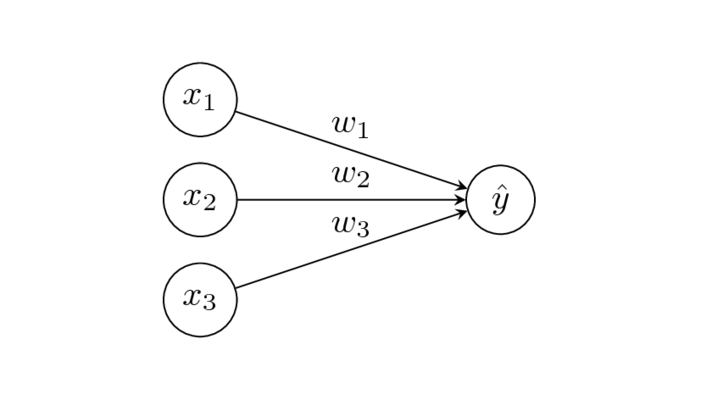

In [10]:
%%tikz -l calc,matrix,positioning -f png -s 1600,400

\clip (-2,-4) rectangle (5,0);
\tikzset{>=stealth};

\node[draw, circle] (x1) at (0,-1) {$x_1$};
\node[draw, circle] (x2) at (0,-2) {$x_2$}; 
\node[draw, circle] (x3) at (0,-3) {$x_3$};
\node[draw, circle] (y) at (3,-2) {$\hat{y}$};
\path (x1) edge[->] node[above] {$w_1$} (y);
\path (x2) edge[->] node[above] {$w_2$} (y);
\path (x3) edge[->] node[above] {$w_3$} (y);

## 행렬의 곱셈(내적)

벡터의 곱셈을 정의한 후에는 다음과 같이 행렬의 곱셈을 정의할 수 있다. 

$A$ 행렬과 $B$ 행렬을 곱한 결과가 $C$ 행렬이 된다고 하자.

$C$의 $i$번째 행, $j$번째 열의 원소 $c_{ij}$의 값은 $A$ 행렬의 $i$번째 행 벡터 $a_i^T$와 $B$ 행렬의 $j$번째 열 벡터 $b_j$의 곱이다.

$$ C = AB \; \rightarrow \; c_{ij} = a_i^T b_j $$

이 정의가 성립하려면 앞의 행렬 $A$의 열의 수가 뒤의 행렬 $B$의 행의 수와 일치해야만 한다.

$$ A \in \mathbf{R}^{N \times L} , \; B \in \mathbf{R}^{L \times M} \;  \rightarrow \; AB \in \mathbf{R}^{N \times M} $$

다음은 
$$ A \in \mathbf{R}^{4 \times 3} ,\; B \in \mathbf{R}^{3 \times 2} \;  \rightarrow  \; AB \in \mathbf{R}^{4 \times 2} $$
인 예이다.

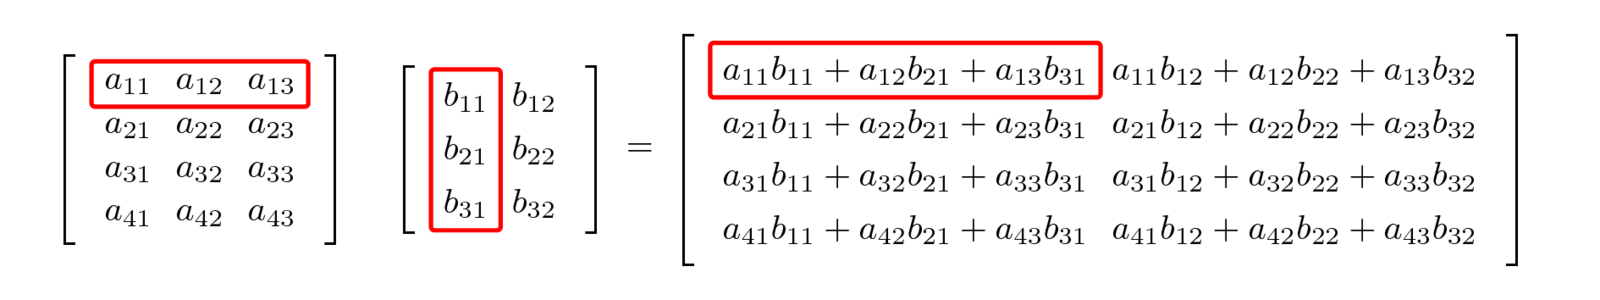

In [11]:
%%tikz -l matrix,fit,calc -f png -s 1600,400

\clip (-2,-1.5) rectangle (14,1.5);

\matrix (A) at (0,0) [matrix of math nodes,left delimiter={[},right delimiter={]}]
{
a_{11} & a_{12} & a_{13} \\
a_{21} & a_{22} & a_{23} \\
a_{31} & a_{32} & a_{33} \\
a_{41} & a_{42} & a_{43} \\
};

\matrix (B) at (3,0) [matrix of math nodes,left delimiter={[},right delimiter={]}]
{
b_{11} & b_{12} \\
b_{21} & b_{22} \\
b_{31} & b_{32} \\    
};
\node at (4.4,0) {=};
\matrix (C) at (9,0) [matrix of math nodes,left delimiter={[},right delimiter={]}]
{
a_{11}b_{11} + a_{12}b_{21} + a_{13}b_{31} & a_{11}b_{12} + a_{12}b_{22} + a_{13}b_{32} \\
a_{21}b_{11} + a_{22}b_{21} + a_{23}b_{31} & a_{21}b_{12} + a_{22}b_{22} + a_{23}b_{32} \\
a_{31}b_{11} + a_{32}b_{21} + a_{33}b_{31} & a_{31}b_{12} + a_{32}b_{22} + a_{33}b_{32} \\
a_{41}b_{11} + a_{42}b_{21} + a_{43}b_{31} & a_{41}b_{12} + a_{42}b_{22} + a_{43}b_{32} \\
};
                                                           
\node[draw,rectangle,red,very thick,inner sep=0,rounded corners=1pt,fit={(A-1-1) (A-1-2) (A-1-3)}] {};
\node[draw,rectangle,red,very thick,inner sep=0,rounded corners=1pt,fit={(B-1-1) (B-2-1) (B-3-1)}] {};
\node[draw,rectangle,red,very thick,inner sep=0,rounded corners=1pt,fit={(C-1-1)}] {};

$A$, $B$가 

$$ A = \begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \end{bmatrix} $$

$$ B = \begin{bmatrix} 1 & 2 \\ 3 & 4 \\ 5 & 6 \end{bmatrix} $$

이면 NumPy를 이용하여 다음과 같이 곱을 구할 수 있다.

In [12]:
A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([[1, 2], [3, 4], [5, 6]])

In [13]:
C = np.dot(A, B)
C

array([[22, 28],
       [49, 64]])

#### 연습 문제 1

1. $A$와 $B$가 위와 같을 때 $AB$를 연습장에 손으로 계산하고 NumPy의 계산결과와 맞는지 확인한다.

2. 순서를 바꾸어 $BA$를 연습장에 손으로 계산하고 NumPy로도 계산한다.

3. $A$,, $B$가 다음과 같을 때, $AB$, $BA$를 (계산이 가능하다면) 손 계산과 NumPy 코드로 구한다. $AB$, $BA$ 모두 계산 가능한가?
$$ A = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix} $$
$$ B = \begin{bmatrix} 4 & 7 \\ 5 & 8 \\ 6 & 9 \end{bmatrix} $$

4. $A$,, $B$가 다음과 같을 때, $AB$, $BA$를 (계산이 가능하다면) 손 계산과 NumPy 코드로 구한다. $AB$, $BA$ 모두 계산 가능한가?
$$ A = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix} $$
$$ B = \begin{bmatrix} 5 & 6 \\ 7 & 8 \end{bmatrix} $$

5. $x$가 다음과 같을 때, $x^Tx$와 $xx^T$를 각각 손 계산과 NumPy 코드로 구한다.
$$ x = \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix} $$

인공 신경망은 내부적으로 다음과 같이 여러 개의 선형회귀 모형을 사용한다. 이 구조는 행렬과 벡터의 곱으로 나타낼 수 있다.

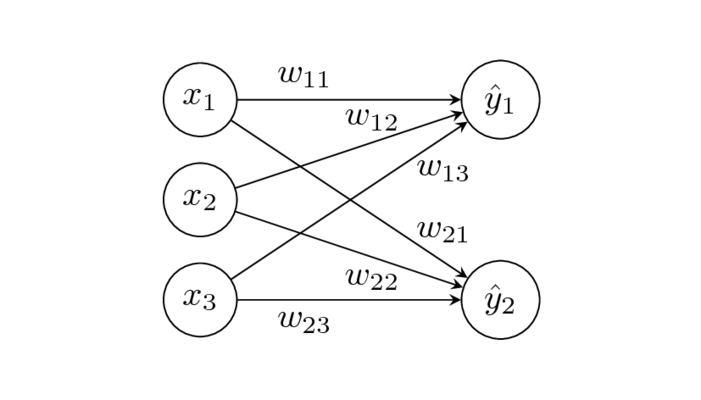

In [14]:
%%tikz -l calc,matrix,positioning -f png -s 1600,400

\clip (-2,-4) rectangle (5,0);
\tikzset{>=stealth};

\node[draw, circle] (x1) at (0,-1) {$x_1$};
\node[draw, circle] (x2) at (0,-2) {$x_2$};
\node[draw, circle] (x3) at (0,-3) {$x_3$};
\node[draw, circle] (y1) at (3,-1) {$\hat{y}_1$};
\node[draw, circle] (y2) at (3,-3) {$\hat{y}_2$};
\path (x1) edge[->] node[above,pos=0.3] {$w_{11}$} (y1);
\path (x2) edge[->] node[above,pos=0.6] {$w_{12}$} (y1);
\path (x3) edge[->] node[below=3pt,pos=0.9] {$w_{13}$} (y1);
\path (x1) edge[->] node[above=2pt,pos=0.9] {$w_{21}$} (y2);
\path (x2) edge[->] node[below,pos=0.6] {$w_{22}$} (y2);
\path (x3) edge[->] node[below,pos=0.3] {$w_{23}$} (y2);

위 그림을 행렬식으로 표현하면 다음과 같다.

$$
\begin{bmatrix}
\hat{y}_{1} \\
\hat{y}_{2} \\
\end{bmatrix}
=
\begin{bmatrix}
w_{11} & w_{12} & w_{13} \\
w_{21} & w_{22} & w_{23} \\
\end{bmatrix}
\begin{bmatrix}
x_{1} \\
x_{2} \\
x_{3} \\    
\end{bmatrix}
$$


$$ \hat{y} = Wx $$

## 교환 법칙과 분배 법칙

행렬의 곱셈은 곱하는 행렬의 순서를 바꾸는 교환 법칙이 성립하지 않는다. 그러나 덧셈에 대한 분배 법칙은 성립한다. 

$$ AB \neq BA $$

$$ A(B + C) = AB + AC $$

$$ (A + B)C = AC + BC $$


## 분배법칙 A(B+C) = AB + AC 가능 but BA+CA 불가능 

$A$, $B$, $C$가 다음과 같을 때 위 법칙들이 성립하지 않거나 성립하는 것을 NumPy 로 보이면 다음과 같다.

$$ A = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix} $$
$$ B = \begin{bmatrix} 5 & 6 \\ 7 & 8 \end{bmatrix} $$
$$ C = \begin{bmatrix} 9 & 8 \\ 7 & 6 \end{bmatrix} $$

In [11]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
C = np.array([[9, 8], [7, 6]])

$AB$ 와 $BA$의 값은 다음처럼 다른 값이 나오므로 교환법칙이 성립하지 않음을 알 수 있다.

In [16]:
np.dot(A, B)

array([[19, 22],
       [43, 50]])

In [17]:
np.dot(B, A)

array([[23, 34],
       [31, 46]])

분배법칙은 다음과 같이 성립한다.

In [18]:
np.dot(A, B + C)

array([[42, 42],
       [98, 98]])

In [19]:
np.dot(A, B) + np.dot(A, C)

array([[42, 42],
       [98, 98]])

In [20]:
np.dot(A + B, C)

array([[110,  96],
       [174, 152]])

In [21]:
np.dot(A, C) + np.dot(B, C)

array([[110,  96],
       [174, 152]])

전치 연산도 마찬가지로 덧셈/뺄셈에 대해 분배 법칙이 성립한다.

$$ (A + B)^T = A^T + B^T $$

전치 연산과 곱셈의 경우에는 분배 법칙이 성립하기는 하지만 전치 연산이 분배되면서 곱셈의 순서가 바뀐다. 

$$ (AB)^T = B^T A^T $$

## (ABC)전치현상=C^t*B^t*A^t

마찬가지로 NumPy로 이 식이 성립하는지 살펴본다.

In [22]:
(A + B).T

array([[ 6, 10],
       [ 8, 12]])

In [23]:
A.T + B.T

array([[ 6, 10],
       [ 8, 12]])

In [24]:
(np.dot(A, B)).T

array([[19, 43],
       [22, 50]])

In [25]:
np.dot(B.T, A.T)

array([[19, 43],
       [22, 50]])

## 곱셈의 연결

연속된 행렬의 곱셈은 계산 순서를 임의의 순서로 해도 상관없다.

$$ ABC = (AB)C = A(BC) $$

$$ ABCD = ((AB)C)D = (AB)(CD) = A(BCD) = A(BC)D $$

#### 연습 문제 2

다음 행렬의 곱셈을 순서를 바꾸어 두 가지 방법으로 해본다.

$$ \begin{bmatrix} 1 & 2 \end{bmatrix} \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix} \begin{bmatrix} 5 \\ 6 \end{bmatrix}$$

## 단위 행렬의 곱셈

어떤 정방 행렬이든 단위 행렬을 곱하면 그 행렬의 값이 변하지 않는다. 

$$ AI = IA = A $$

NumPy로 다음과 같아 확인한다.

In [12]:
A = np.array([[1, 2], [3, 4]])
I = np.eye(2)

In [27]:
np.dot(A, I)

array([[ 1.,  2.],
       [ 3.,  4.]])

In [28]:
np.dot(I, A)

array([[ 1.,  2.],
       [ 3.,  4.]])

그럼 이러한 행렬의 곱셈은 데이터 분석에서 어떤 경우에 사용될까. 행렬의 곱셈을 사용하는 몇가지 예를 살펴보자.

## 행렬의 나누기는 존재하진 않지만 역행렬이 존재 ,inverse matrix 

## 여러개의 벡터에 대한 가중합 계산

벡터 하나의 가중합은 $w^Tx$ 또는 $x^Tw$로 표시할 수 있다는 것을 배웠다. 그런데 만약 이렇게 $w$ 가중치를 사용한 가중합을 하나의 벡터 $x$가 아니라 여러개의 벡터 $x_1, \cdots, x_M$개에 대해서 모두 계산해야 한다면 어떻게 해야 할까? 예를 들어 위와 같이 선형 회귀 모형을 사용하여 여러개의 데이터 $x_1, x_2, x_3, \cdots, x_N$ 개의 데이터 모두에 대해 예측값 $y_1, y_2, y_3, \cdots, y_N$을 한꺼번에 계산하고 싶다면 다음과 같이 데이터 행렬 $X$를 사용하여  $\hat{y} = Xw$라는 수식으로 간단하게 표시할 수 있다.

$$
\begin{eqnarray}
\hat{y} = 
\begin{bmatrix}
\hat{y}_1 \\
\hat{y}_2 \\
\vdots \\
\hat{y}_M \\
\end{bmatrix}
&=& 
\begin{bmatrix}
w_1 x_{1,1} + w_2 x_{1,2} + \cdots + w_N x_{1,N} \\
w_1 x_{2,1} + w_2 x_{2,2} + \cdots + w_N x_{2,N} \\
\vdots  \\
w_1 x_{M,1} + w_2 x_{M,2} + \cdots + w_N x_{M,N} \\
\end{bmatrix}
\\
&=& 
\begin{bmatrix}
x_{1,1} & x_{1,2} & \cdots & x_{1,N} \\
x_{2,1} & x_{2,2} & \cdots & x_{2,N} \\
\vdots & \vdots & \vdots & \vdots \\
x_{M,1} & x_{M,2} & \cdots & x_{M,N} \\
\end{bmatrix}
\begin{bmatrix}
w_1 \\ w_2 \\ \vdots \\ w_N
\end{bmatrix}
\\
&=& 
\begin{bmatrix}
x_1^T \\
x_2^T \\
\vdots \\
x_M^T \\
\end{bmatrix}
\begin{bmatrix}
w_1 \\ w_2 \\ \vdots \\ w_N
\end{bmatrix}
\\
&=& X w 
\end{eqnarray}
$$

즉.

$$ \hat{y} = Xw $$

#### 연습 문제 3

$x_1$, $x_2$가 다음과 같을 때,
$$
x_1 = 
\begin{bmatrix}
x_{11} \\
x_{21} \\
x_{31} \\
\end{bmatrix}
\;\;
x_2 = 
\begin{bmatrix}
x_{12} \\
x_{22} \\
x_{32} \\
\end{bmatrix}
$$

다음 등식이 성립함을 보인다.

$$
Xw =
\begin{bmatrix}
x_1^T \\
x_2^T \\
\end{bmatrix}
\begin{bmatrix}
w_1 \\ w_2 \\ w_3
\end{bmatrix}
=
\begin{bmatrix}
x_1^Tw \\
x_2^Tw \\
\end{bmatrix}
$$

## 잔차

선형 회귀 분석(linear regression)을 한 결과는 가중치 벡터 $w$라는 형태로 나타나고 예측치는 이 가중치 벡터를 사용한 독립 변수 데이터 레코드 즉, 벡터 $x_i$의 가중합 $w^Tx_i$이 된다고 하였다.

이 예측치와 실제 값(target) $y_{i}$의 차이를 **오차(error)** 혹은 **잔차(residual)** $e_i$ 라고 한다. 이러한 잔차 값을 모든 독립 변수 벡터에 대해 구하면 잔차 벡터 $e$가 된다.

$$ e_i = y_i - \hat{y}_i  = y_i - w^Tx_i$$

잔차 벡터는 다음과 같이 $y-Xw$로 간단하게 표기할 수 있다.



$$
\begin{eqnarray}
e &=&
\begin{bmatrix}
e_{1} \\
e_{2} \\
\vdots \\
e_{M} \\
\end{bmatrix}
\\ 
&=&
\begin{bmatrix}
y_{1} \\
y_{2} \\
\vdots \\
y_{M} \\
\end{bmatrix}
-
\begin{bmatrix}
x^T_{1}w \\
x^T_{2}w \\
\vdots \\
x^T_{M}w \\
\end{bmatrix}
\\ &=& y - Xw
\end{eqnarray}
$$

$$
e = y - Xw
$$

## 잔차 제곱합

잔차의 크기는 잔차 벡터의 각 원소를 제곱한 후 더한 **잔차 제곱합(RSS: Residual Sum of Squares)**를 이용하여 구한다. 이 값은 $e^Te$로 간단하게 쓸 수 있으며 그 값은 다음과 같이 계산한다.

$$
e^Te = \sum_{i=1}^{N} (y_i - w^Tx_i)^2 = (y - Xw)^T (y - Xw)
$$

#### 연습 문제 4


분배 법칙을 사용하여 위 식 $(y - Xw)^T (y - Xw)$을 풀어쓰면 다음과 같아짐을 보인다.

$$ y^Ty - w^TX^Ty - y^TXw + w^TX^TXw $$

## 이차 형식

위의 연습 문제에서 마지막 항은 $w^TX^TXw$라는 형태이다. 이 식에서 $X^TX$는 정방 행렬이 되므로 이 정방 행렬을 $A$라고 이름 붙이면 마지막 항은 $w^TAw$와 같은 형태가 된다. 

벡터의 **이차 형식(Quadratic Form)**이란 이렇게 어떤 벡터에 대해 "행벡터 x 정방 행렬 x 열벡터" 의 형식으로 되어 있는 식을 말한다. 만약 벡터가 $x$이면 이차 형식은 $x^TAx$ 이다.

이 수식을 풀면 $i=1,\ldots,N, j=1,\ldots,N$ 에 대해 가능한 모든 $i,j$ 쌍의 조합을 구한 다음 $i$, $j$에 해당하는 원소 $x_i$, $x_j$를 가중치 $a_{i,j}$와 같이 곱한 값  $a_{i,j}x_ix_j$의 총합이 된다.

$$
\begin{eqnarray}
x^T A x 
&=& 
\begin{bmatrix}
x_{1} & x_{2} & \cdots & x_{N} 
\end{bmatrix}
\begin{bmatrix}
a_{1,1} & a_{1,2} & \cdots & a_{1,N} \\
a_{2,1} & a_{2,2} & \cdots & a_{2,N} \\
\vdots & \vdots & \ddots & \vdots \\
a_{N,1} & a_{N,2} & \cdots & a_{N,N} \\
\end{bmatrix}
\begin{bmatrix}
x_{1} \\
x_{2} \\
\vdots \\
x_{N} \\
\end{bmatrix} 
\end{eqnarray}
$$

$$
\begin{eqnarray}
&=& \sum_{i=1}^{N} \sum_{j=1}^{N} a_{i,j} x_i x_j 
\end{eqnarray}
$$

#### 연습 문제 5

3차원 벡터와 행렬에 대해 위 식이 성립함을 보인다.

$$ x = \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix} $$

$$ A = 
\begin{bmatrix} 
a_{11} & a_{12} & a_{13} \\
a_{21} & a_{22} & a_{23} \\
a_{31} & a_{32} & a_{33} \\
\end{bmatrix} 
$$




예를 들어 $ x = [1, 2, 3]^T $ 이고 A가 다음과 같다면

$$ A =
\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9 \\
\end{bmatrix}
$$

NumPy 에서 벡터의 이차 형식은 다음과 같이 계산한다.

In [29]:
x = np.array([1,2,3])
x

array([1, 2, 3])

In [30]:
A = np.arange(1, 10).reshape(3,3)
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [31]:
np.dot(np.dot(x, A), x)

228